# Fordgobike Trip Data
##  (Rishabh Varma)

## Preliminary Wrangling

> This document explores a dataset containing duration of renting bikes and related attributes for two sets of periods: January 2018 to June 2018 & January 2019 to June 2019. Comparision is made to see any difference in trends that may have occured over the course of a year for the **duration** for which the bike is rented for..

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

%matplotlib inline

In [3]:
## Importing dataset for individual 'Months' for 2018 and 2019:

bike_1 = pd.read_csv('201801-fordgobike-tripdata.csv', low_memory=False)
bike_2 = pd.read_csv('201802-fordgobike-tripdata.csv', low_memory=False)
bike_3 = pd.read_csv('201803-fordgobike-tripdata.csv', low_memory=False)
bike_4 = pd.read_csv('201804-fordgobike-tripdata.csv', low_memory=False)
bike_5 = pd.read_csv('201805-fordgobike-tripdata.csv', low_memory=False)
bike_6 = pd.read_csv('201806-fordgobike-tripdata.csv', low_memory=False)
bike_7 = pd.read_csv('201901-fordgobike-tripdata.csv', low_memory=False)
bike_8 = pd.read_csv('201902-fordgobike-tripdata.csv', low_memory=False)
bike_9 = pd.read_csv('201903-fordgobike-tripdata.csv', low_memory=False)
bike_10 = pd.read_csv('201904-fordgobike-tripdata.csv', low_memory=False)
bike_11 = pd.read_csv('201905-baywheels-tripdata.csv', low_memory=False)
bike_12 = pd.read_csv('201906-baywheels-tripdata.csv', low_memory=False)

## Setting up the dataset for *2018*

In [4]:
### Merging the data set based on year 2018:
bike_2018 = pd.concat([bike_1, bike_2, bike_3, bike_4, bike_5, bike_6])
bike_2018.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [5]:
# high-level overview of data shape and composition
print(bike_2018.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819164 entries, 0 to 195967
Data columns (total 16 columns):
duration_sec               819164 non-null int64
start_time                 819164 non-null object
end_time                   819164 non-null object
start_station_id           817103 non-null float64
start_station_name         817103 non-null object
start_station_latitude     819164 non-null float64
start_station_longitude    819164 non-null float64
end_station_id             817103 non-null float64
end_station_name           817103 non-null object
end_station_latitude       819164 non-null float64
end_station_longitude      819164 non-null float64
bike_id                    819164 non-null int64
user_type                  819164 non-null object
member_birth_year          760467 non-null float64
member_gender              760690 non-null object
bike_share_for_all_trip    819164 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 106.2+ MB
None


### Looking at the existing features, it seems that we will have to introduce new features such as:
* Age of the customer from the variable 'member_birth_year'
* Duration of ride in terms of minutes from the variable 'duration_sec'
* The Month of renting the bike from the variable 'start_time'. we will first have to convert the datatype of the variable and then extract the 'month' parameter from the data.

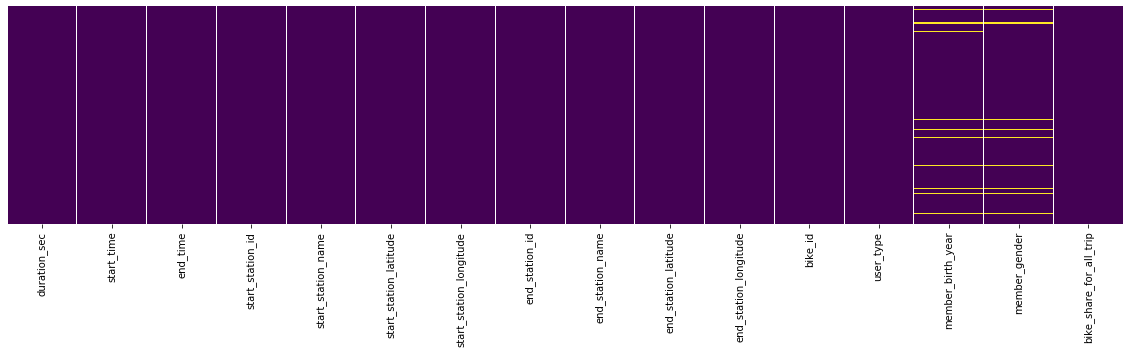

In [356]:
## Efficient way to find the columns with the most null vaues 'bike_2018':
fig, axes = plt.subplots(1,1, figsize=(20,4))
sb.heatmap(bike_2018.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [6]:
## Maximum Percentage of data missing for any variable in bike_2018:
print((bike_2018["member_birth_year"].isnull().sum() / bike_2018.shape[0]) * 100)

## As the percentage of data missing is not that high, we will remove the NA values instead of replacing them.
bike_2018.dropna(inplace= True)
bike_2018.info()

7.165476021895493
<class 'pandas.core.frame.DataFrame'>
Int64Index: 758508 entries, 0 to 195967
Data columns (total 16 columns):
duration_sec               758508 non-null int64
start_time                 758508 non-null object
end_time                   758508 non-null object
start_station_id           758508 non-null float64
start_station_name         758508 non-null object
start_station_latitude     758508 non-null float64
start_station_longitude    758508 non-null float64
end_station_id             758508 non-null float64
end_station_name           758508 non-null object
end_station_latitude       758508 non-null float64
end_station_longitude      758508 non-null float64
bike_id                    758508 non-null int64
user_type                  758508 non-null object
member_birth_year          758508 non-null float64
member_gender              758508 non-null object
bike_share_for_all_trip    758508 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 98.4+ MB


#### *Converting the variable to 'datetime' and constructing new columns for 'start_month' and 'end_month'*

In [7]:
## Converting the data type for the variables 'start_time' and 'end_time' to "datetime"
bike_2018['start_time'] = pd.to_datetime(bike_2018['start_time'])
bike_2018['end_time'] = pd.to_datetime(bike_2018['end_time'])

In [8]:
### Extracting 'Date' from the value:
bike_2018['start_month'] = bike_2018['start_time'].dt.month 
bike_2018['end_month'] = bike_2018['end_time'].dt.month 

### Replacing Month number to Names:
bike_2018['start_month'] = bike_2018['start_month'].replace(to_replace = [1,2,3,4,5,6],
                                                            value = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])
bike_2018['end_month'] = bike_2018['end_month'].replace(to_replace = [1,2,3,4,5,6,7],
                                                            value = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul'])

#### *Calculating the 'Age' of the person as on 2018:*

In [9]:
bike_2018['Age'] = 2018 - bike_2018['member_birth_year'].astype(int)

#### *Converting the duration of the ride to 'hours' for a better understanding of the data:*

In [10]:
bike_2018['duration_minutes'] = bike_2018['duration_sec']/60

In [11]:
### Dropping the columns of no use
bike_2018.drop(['duration_sec', 'start_time', 'end_time', 'start_station_latitude', 'start_station_longitude',
               'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True) 

In [12]:
bike_2018.head()

,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,end_month,Age,duration_minutes
0,120.0,Mission Dolores Park,285.0,Webster St at O'Farrell St,2765,Subscriber,1986.0,Male,No,Jan,Feb,32,1254.733333
2,304.0,Jackson St at 5th St,296.0,5th St at Virginia St,3039,Customer,1996.0,Male,No,Jan,Feb,22,1192.933333
4,74.0,Laguna St at Hayes St,19.0,Post St at Kearny St,617,Subscriber,1991.0,Male,No,Jan,Feb,27,666.100000
6,110.0,17th & Folsom Street Park (17th St at Folsom St),134.0,Valencia St at 24th St,3571,Subscriber,1988.0,Male,No,Jan,Feb,30,7.550000
7,81.0,Berry St at 4th St,93.0,4th St at Mission Bay Blvd S,1403,Subscriber,1980.0,Male,No,Jan,Jan,38,3.000000


## Setting up data set for *2019*

In [13]:
### Merging the data set based on year 2019:
bike_2019 = pd.concat([bike_7, bike_8, bike_9, bike_10, bike_11, bike_12])
bike_2019.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,4861,No,80825,196.0,37.808894,-122.256460,Grand Ave at Perkins St,2019-02-01 16:24:49.8640,1989.0,Male,NaN,229.0,37.775745,-122.213037,Foothill Blvd at 42nd Ave,2019-01-31 17:57:44.6130,Subscriber
1,5506,No,65900,134.0,37.752428,-122.420628,Valencia St at 24th St,2019-02-01 15:16:54.1730,1989.0,Male,NaN,4.0,37.785881,-122.408915,Cyril Magnin St at Ellis St,2019-01-31 20:58:33.8860,Subscriber
2,2717,No,62633,157.0,37.846784,-122.291376,65th St at Hollis St,2019-02-01 11:30:46.5300,1965.0,Female,NaN,245.0,37.870139,-122.268422,Downtown Berkeley BART,2019-01-31 18:06:52.9240,Customer
3,4557,No,44680,53.0,37.775946,-122.437777,Grove St at Divisadero,2019-02-01 08:10:50.3180,1974.0,Male,NaN,85.0,37.770083,-122.429156,Church St at Duboce Ave,2019-01-31 19:46:09.7190,Customer
4,2100,No,60709,28.0,37.787168,-122.388098,The Embarcadero at Bryant St,2019-02-01 07:10:51.0650,NaN,NaN,NaN,16.0,37.794130,-122.394430,Steuart St at Market St,2019-01-31 14:19:01.5410,Customer


In [14]:
## Looking at the above error, let us check which data frame has different columns.

columns_2019 = (len(bike_7.columns), len(bike_8.columns), len(bike_9.columns), len(bike_10.columns), len(bike_11.columns), len(bike_12.columns))
print(columns_2019)

(16, 16, 16, 16, 16, 17)


In [15]:
## Problem is with the dataset for 2019 (bike_12)
bike_12.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'rental_access_method'],
      dtype='object')

In [16]:
bike_12.drop(['rental_access_method'], axis=1, inplace=True) ### Dropping the column of no use

In [17]:
### Merging the data set based on year 2019 Again:
bike_2019 = pd.concat([bike_7, bike_8, bike_9, bike_10, bike_11, bike_12])
bike_2019.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,1989.0,Male,No
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,1989.0,Male,No
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,1965.0,Female,No
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,1974.0,Male,No
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,NaN,NaN,No


In [18]:
# high-level overview of data shape and composition
print(bike_2019.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244839 entries, 0 to 191771
Data columns (total 16 columns):
duration_sec               1244839 non-null int64
start_time                 1244839 non-null object
end_time                   1244839 non-null object
start_station_id           1241934 non-null float64
start_station_name         1241934 non-null object
start_station_latitude     1244839 non-null float64
start_station_longitude    1244839 non-null float64
end_station_id             1241832 non-null float64
end_station_name           1241832 non-null object
end_station_latitude       1244839 non-null float64
end_station_longitude      1244839 non-null float64
bike_id                    1244839 non-null int64
user_type                  1244839 non-null object
member_birth_year          1176326 non-null float64
member_gender              1176550 non-null object
bike_share_for_all_trip    1240946 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 161.5+ MB
Non

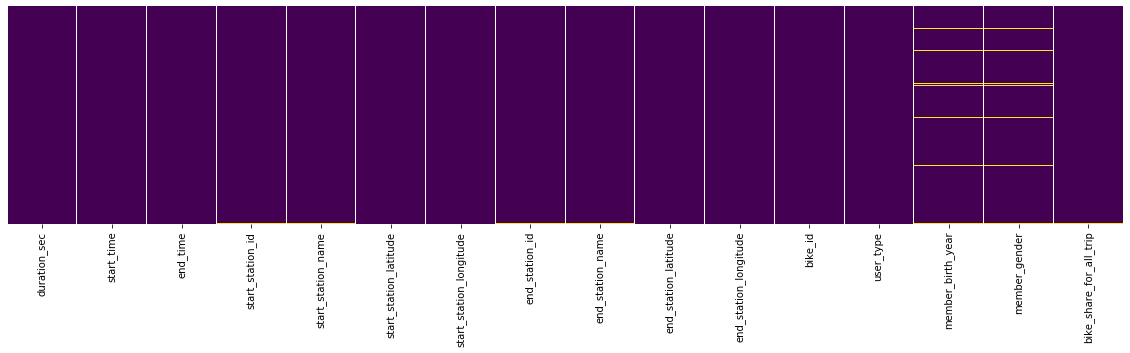

In [370]:
## Efficient way to find the columns with the most null vaues 'bike_2019':
fig, axes = plt.subplots(1,1, figsize=(20,4))
sb.heatmap(bike_2019.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [19]:
## Maximum Percentage of data missing for any variable in 2018:
print((bike_2019["member_birth_year"].isnull().sum() / bike_2019.shape[0]) * 100)

## As the percentage of data missing is not that high, we will remove the NA values instead of replacing them.
bike_2019.dropna(inplace= True)
bike_2019.isnull().sum()

5.503763940557775


duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

#### *Converting the variable to 'datetime' and constructing new columns for 'start_month' and 'end_month'*

In [20]:
## Converting the data type for the variables 'start_time' and 'end_time' to "datetime"
bike_2019['start_time'] = pd.to_datetime(bike_2019['start_time'])
bike_2019['end_time'] = pd.to_datetime(bike_2019['end_time'])

In [21]:
### Extracting 'Date' from the value:
bike_2019['start_month'] = bike_2019['start_time'].dt.month 
bike_2019['end_month'] = bike_2019['end_time'].dt.month 

### Replacing Month number to Names:
bike_2019['start_month'] = bike_2019['start_month'].replace(to_replace = [1,2,3,4,5,6],
                                                            value = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])
bike_2019['end_month'] = bike_2019['end_month'].replace(to_replace = [1,2,3,4,5,6,7],
                                                            value = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul'])

#### *Calculating the 'Age' of the person as on 2019:*

In [22]:
bike_2019['Age'] = 2019 - bike_2019['member_birth_year'].astype(int)

#### *Converting the duration of the ride to 'hours' for a better understanding of the data:*

In [23]:
bike_2019['duration_minutes'] = bike_2019['duration_sec']/60

In [24]:
### Dropping the columns of no use
bike_2019.drop(['duration_sec', 'start_time', 'end_time', 'start_station_latitude', 'start_station_longitude',
               'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True) 

In [25]:
bike_2019.head()

,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,end_month,Age,duration_minutes
0,229.0,Foothill Blvd at 42nd Ave,196.0,Grand Ave at Perkins St,4861,Subscriber,1989.0,Male,No,Jan,Feb,30,1347.083333
1,4.0,Cyril Magnin St at Ellis St,134.0,Valencia St at 24th St,5506,Subscriber,1989.0,Male,No,Jan,Feb,30,1098.333333
2,245.0,Downtown Berkeley BART,157.0,65th St at Hollis St,2717,Customer,1965.0,Female,No,Jan,Feb,54,1043.883333
3,85.0,Church St at Duboce Ave,53.0,Grove St at Divisadero,4557,Customer,1974.0,Male,No,Jan,Feb,45,744.666667
5,245.0,Downtown Berkeley BART,266.0,Parker St at Fulton St,3532,Subscriber,1994.0,Male,No,Jan,Feb,25,112.216667


### What is the structure of your dataset?

> I have extratced data for 2018 (Jan - Jun) and 2019 (Jan - Jun) for comparision of the bike trip between first half of the year 2018 and 2019.
>
> There are **758,505 and 117,2807** entries in the data set for **2018 and 2019** respectivey, after removing the empty rows in the dataset. There are **13 features** left in each of the dataset after removing and adding new columns to the data sets. There are few variables that provide the 'ID' number such as **'end_station_id'** and are not that important for our visualization. 
> Some variables are numbers such as 'age' and 'duration_hours', while others are mostly categorical in nature, such as:

   * member_gender: Male, Female
   * user_type: Subscriber, Customer
   * start_month / end_month: Jan, Feb, Mar, Apr, May, Jun, Jul

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in figuring out what features affect the **duration** for which the bikes are used.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the **'Month'** in which the bike was used, the **'Location - start and end point'**, the **'Age'** of the rider, **'Gender'**, maybe **'Membership'** details will be helpful in determining the duration for which the bike was rented.

## Univariate Exploration

> I'll start by looking at the distribution of one of the main variable of interest: Age.

###  *1. Distribution of Age of Customers*

In [378]:
def plot_bars_1(df, y, x_col, color, xlabel, ylabel, title):
    bin_edges = np.arange(0, df[x_col].max()+1, y)
    plt.hist(data = df, x = x_col, bins = bin_edges, rwidth= 0.75, color = color)
    plt.xlabel(xlabel, fontsize = 16)
    plt.ylabel(ylabel, fontsize = 16)
    plt.title(title, fontsize = 22, fontweight="bold")

(10, 90)

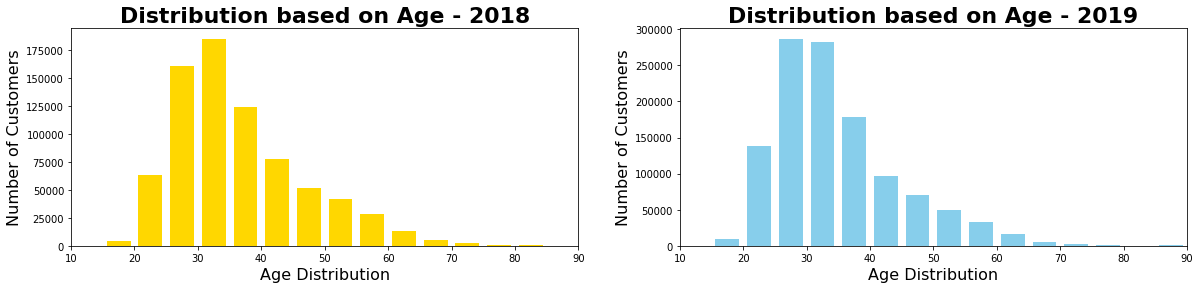

In [379]:
fig = plt.figure(figsize = [20, 4])

## 2018
plt.subplot(1, 2, 1)
plot_bars_1(bike_2018, 5, 'Age', "gold", 'Age Distribution','Number of Customers', 'Distribution based on Age - 2018')
plt.xlim(10, 90)

## 2019
plt.subplot(1, 2, 2)
plot_bars_1(bike_2019, 5, 'Age', 'skyblue', 'Age Distribution','Number of Customers', 'Distribution based on Age - 2019')
plt.xlim(10, 90)

> * The above distribution by Age suggest that the main customers are between 20 to 40 years of age, while few even going beyong the age of 90 years - I had to exclude the outliers as the numbers were not significant.
> * Also, the number of customers were more in 2019 as compared to 2018
> * The overall trend of age distribution is almost similar for the dataset of 2018 and 2019
>
>
> Next I will look at the duration distribution.

###  *2. Distribution of Duration (Hours) of Biking:*

(0, 250)

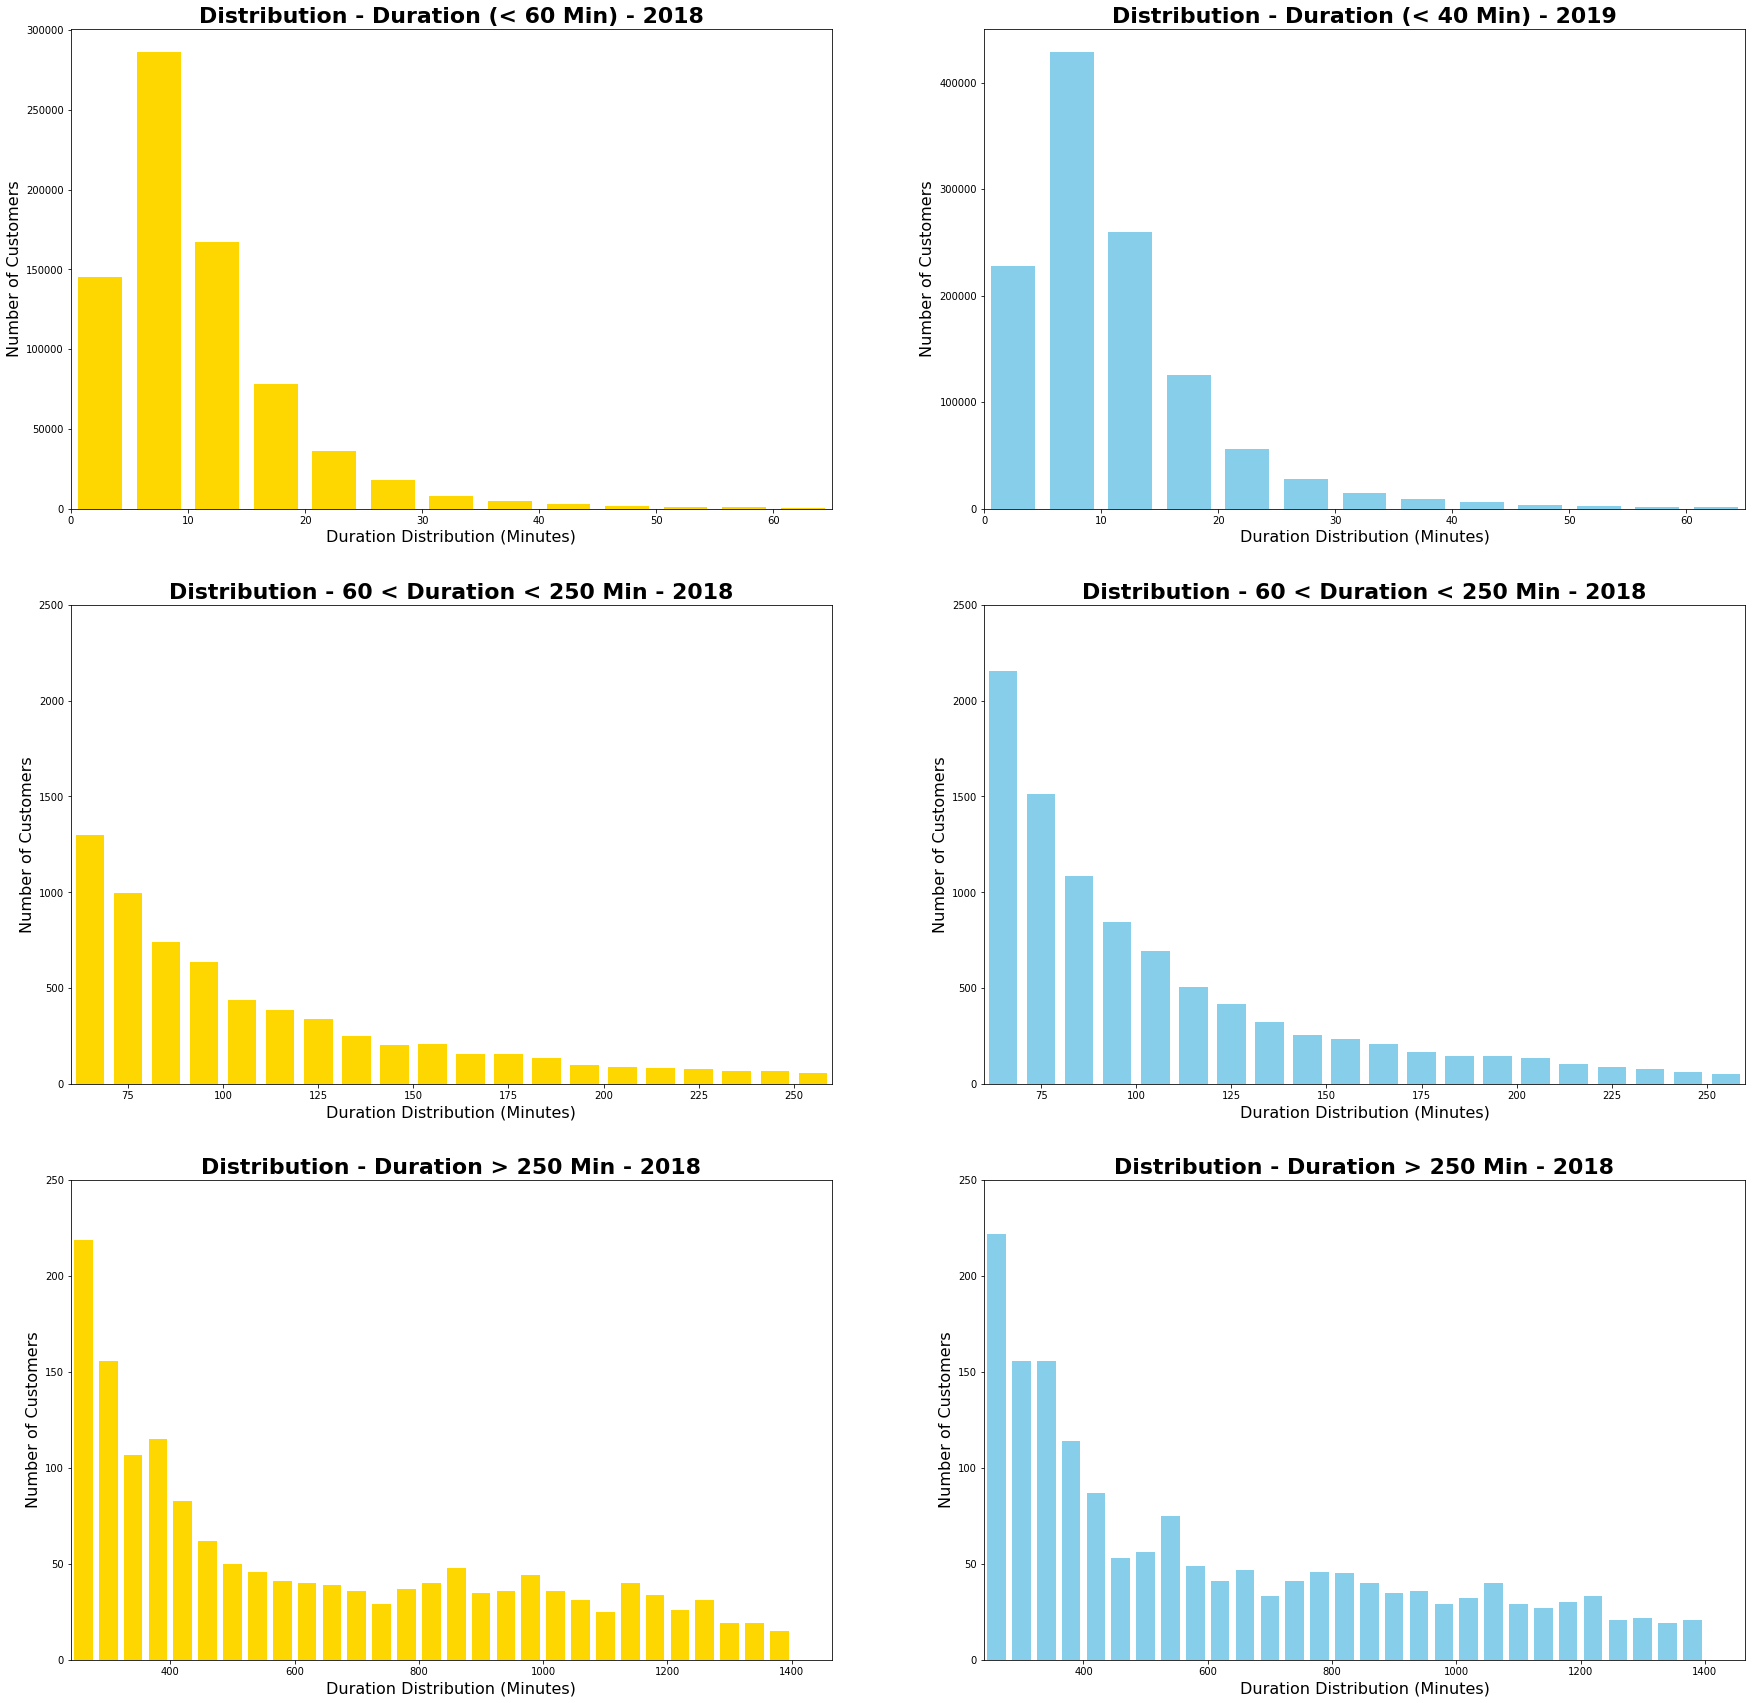

In [380]:
fig = plt.figure(figsize = [30, 30])

## 2018: Duration < 60 Minutes
plt.subplot(3, 2, 1)
plot_bars_1(bike_2018, 5, 'duration_minutes', 'gold', 'Duration Distribution (Minutes)',
            'Number of Customers', 'Distribution - Duration (< 60 Min) - 2018')
plt.xlim(0,65)

## 2019: Duration < 60 Minutes
plt.subplot(3, 2, 2)
plot_bars_1(bike_2019, 5, 'duration_minutes', 'skyblue', 'Duration Distribution (Minutes)',
            'Number of Customers', 'Distribution - Duration (< 40 Min) - 2019')
plt.xlim(0,65)

## 2018: 60 < Duration < 250 Minutes
plt.subplot(3, 2, 3)
plot_bars_1(bike_2018, 10, 'duration_minutes', 'gold', 'Duration Distribution (Minutes)',
            'Number of Customers', 'Distribution - 60 < Duration < 250 Min - 2018')
plt.xlim(60, 260)
plt.ylim(0,2500)

## 2019: 60 < Duration < 250 Minutes
plt.subplot(3, 2, 4)
plot_bars_1(bike_2019, 10, 'duration_minutes', 'skyblue', 'Duration Distribution (Minutes)',
            'Number of Customers', 'Distribution - 60 < Duration < 250 Min - 2018')
plt.xlim(60, 260)
plt.ylim(0,2500)

## 2018: Duration > 250 Minutes
plt.subplot(3, 2, 5)
plot_bars_1(bike_2018, 40, 'duration_minutes', 'gold', 'Duration Distribution (Minutes)',
            'Number of Customers', 'Distribution - Duration > 250 Min - 2018')
plt.xlim(240, )
plt.ylim(0,250)

## 2019: Duration > 250 Minutes
plt.subplot(3, 2, 6)
plot_bars_1(bike_2019, 40, 'duration_minutes', 'skyblue', 'Duration Distribution (Minutes)',
            'Number of Customers', 'Distribution - Duration > 250 Min - 2018')
plt.xlim(240, )
plt.ylim(0,250)


> * People mostly tend to rent the bikes or ride them for duration **less than 20 minutes**
> * The above graphs were distribute into **three** different duration range as the number of customers varied drastically over a certain duration period. If everything was plotted in one graph, the graph would not be able to clearly state 'number of customer' for **higher duration period**.
> * The trends across 2018 and 2019 were very identical: Most people choose to rent bikes for **less than 20 mins**, while there were few who had the bike for **more than 400 mins**
> * Going forward, most of the analysis will be based on the 'Duration data' closer to the **Mean value** as the frequency of customers for **duration more than 45 mins** are very small.
>
>
> Next I will look at the distribution of bikes based on the month they were rented

In [381]:
## Here I have tried to convert the 'Duration_minutes' graph to a Log grapph. I was not able to interpret the graph.

# log_binsize = 0.025
# bins = 10 ** np.arange(2.4, np.log10(bike_2018['duration_minutes'].max())+log_binsize, log_binsize)

# plt.figure(figsize=[8, 5])
# plt.hist(data = bike_2018, x = 'duration_minutes', bins = bins)
# plt.xscale('log')
# plt.xticks([200, 300, 1000, 2000], [2, 3, 4, 6, 10, 20])
# plt.xlabel('Duration (Mins)')
# plt.show()

###  *3. Month of Renting Bikes:*

In [382]:
def plot_bars_2(df, x_col, color, xlabel, ylabel, title):
    sb.countplot(x= x_col, data = df, color = color)
    plt.xlabel(xlabel, fontsize = 14)
    plt.ylabel(ylabel, fontsize = 14)
    plt.title(title, fontsize = 18, fontweight="bold")

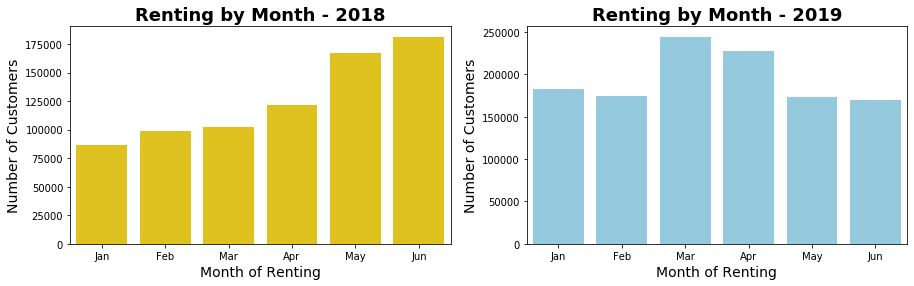

In [383]:
fig = plt.figure(figsize = [15, 4])

## 2018
plt.subplot(1, 2, 1)
plot_bars_2(bike_2018, 'start_month', 'gold', 'Month of Renting','Number of Customers', 'Renting by Month - 2018')

## 2019
plt.subplot(1, 2, 2)
plot_bars_2(bike_2019, 'start_month', 'skyblue', 'Month of Renting','Number of Customers', 'Renting by Month - 2019')

> * There was a **gradual increse** notice in the number of customers renting bikes for the year 2018, from January to June
> * The Number of bikes rented were different for 2019. It was maximum in the month of **March and April**
> * The number of bikes rented in any given month of 2019 was **greater than** that of 2018. **But** if we look at the monthly trend, **May and June** were the best months for first half of 2018, while **March and April** were for 2019
> * The number of renters increased by **100,000** from the month of **March to June in 2018**, whereas steady increase of **50,000** was seen in the month of **March and April for the year 2019**. 
>
>
> Next I will look at the Gender distribution

###  *4. Gender Distribution:*

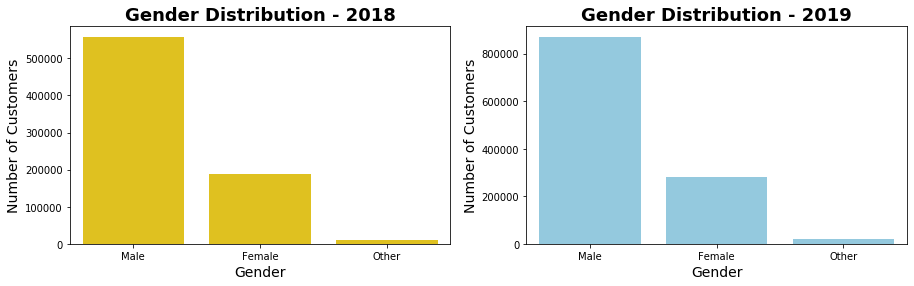

In [384]:
fig = plt.figure(figsize = [15, 4])

## 2018
plt.subplot(1, 2, 1)
plot_bars_2(bike_2018, 'member_gender', 'gold', 'Gender','Number of Customers', 'Gender Distribution - 2018')

## 2019
plt.subplot(1, 2, 2)
plot_bars_2(bike_2019, 'member_gender', 'skyblue', 'Gender', 'Number of Customers', 'Gender Distribution - 2019')

> * There were **more** Male than Female who rented the bikes for both the years, 2018 and 2019
> * It can be observed that the number of Males significantly increased as compared to number of Females from 2018 to 2019. There were approx. **~300,000** more Males as compared to **~85,000** more females in 2019 rideing / renting bikes.
>
> Finally I will look at the Membership status of the customer

###  *5. Membership Type:*

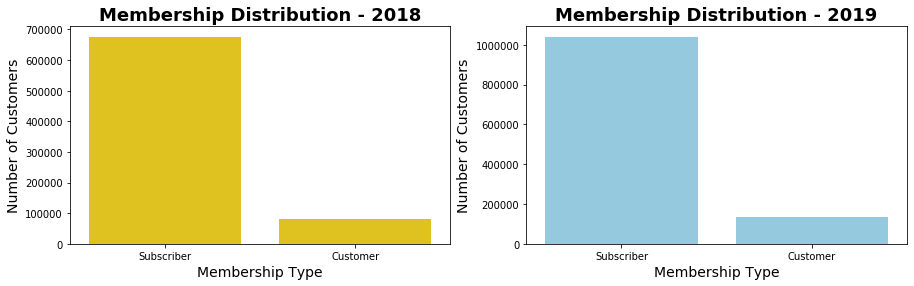

In [385]:
fig = plt.figure(figsize = [15, 4])

## 2018
plt.subplot(1, 2, 1)
plot_bars_2(bike_2018, 'user_type', 'gold', 'Membership Type','Number of Customers', 'Membership Distribution - 2018')

## 2019
plt.subplot(1, 2, 2)
plot_bars_2(bike_2019, 'user_type', 'skyblue', 'Membership Type','Number of Customers', 'Membership Distribution - 2019')

> * Mostly the people who rented the bikes were **Subscribers**, which means that the business is strong in terms of loyal customers who need the bike services on regular basis.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> * All the graphs were build with their standard values as represented in the Dataframe 2018 and 2019. 
> * The main problem was the 'Duration Distribution' graph. Due to the high fluctuation of the number of customers and the Duration of renting the bikes, It was not possible to plot all the values in one graph. Hence, I choose to make **three** different graphs for **three** duration ranges: **< 60 Minute**, **60 < Minutes < 250**, & **> 250 Minutes**.
        > * I tried to convert the duration series into 'Log' and plot the graph. But, I was not able to interpret what it was telling. I have included the graph as a 'Commented code'.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> * Most of the data was clean, and the values were within the expected range. Hence there were not that many unusual distributions found.
> * But, there were outliers in the 'Age' distribution plot. There were people who were more than 95 years of age. But that can be possible. Right?. Just for the clarity of the Graph, I had to put the 'xlimit' to 90 years so that we could see a better distribution and a better graph presentation.
> * I tried to change the data format for the **Duration_minutes** plot into 'Log' format. The details are discussed in the previous section notes.

## Bivariate Exploration

> To start of with, I will first look at the relationship between Duration and the Month the bike was rented in.

### *1. Relation between the Duration of the Ride v/s the Month the bike was rented in:*

In [386]:
def plot_bars_3(df, x_col, y_col, palette, xlabel, ylabel, title):
    sb.boxplot(data = df, x = x_col, y = y_col, palette = palette, saturation = 0.5)
    plt.ylim(0, 20)
    plt.xlabel( xlabel, fontsize = 14)
    plt.ylabel( ylabel, fontsize = 14)
    plt.title( title, fontsize = 18, fontweight="bold")

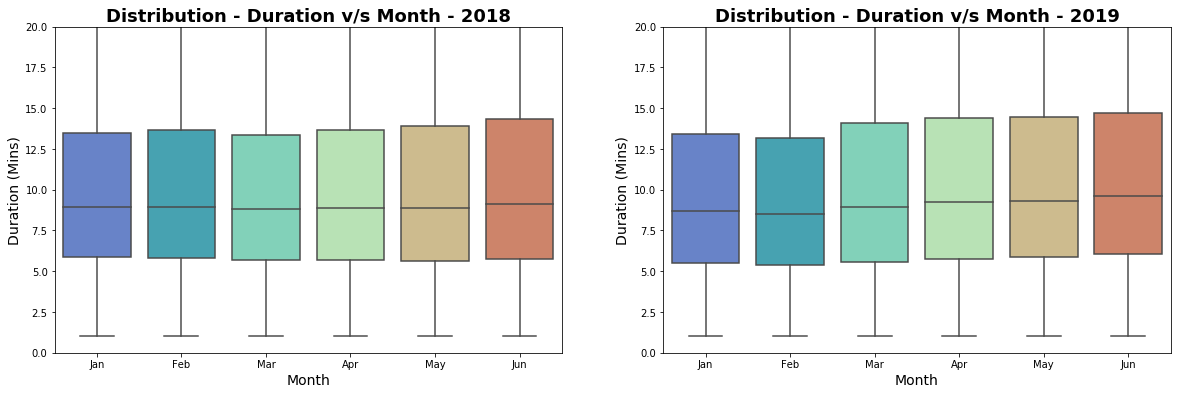

In [387]:
fig = plt.figure(figsize = [20, 6])

## 2018
plt.subplot(1, 2, 1)
plot_bars_3(bike_2018, 'start_month', 'duration_minutes', 'rainbow', 'Month', 'Duration (Mins)',
           'Distribution - Duration v/s Month - 2018')


## 2019
plt.subplot(1, 2, 2)
plot_bars_3(bike_2019, 'start_month', 'duration_minutes', 'rainbow', 'Month', 'Duration (Mins)',
           'Distribution - Duration v/s Month - 2019')

> * I decided to plot a Box-plot as it would get rid of the outliers (with lesser frequency) and provide an approximate mean of the duration for most of the riders.
> * As can be seen from the above graph, no variation was found in the duration of renting among the months. The average mean duration for renting the bike was approx. **8.5 mins** for every month in 2018 and 2019
> * No real difference was observed in the pattern when I compared between the **years** as well.
> * I was hoping to see a pattern here but wasn't to be the case
>
> 
> Next I will look at the Gender distribution with the Duration of renting the bike

### *2. Relationship between the Duration of the Ride v/s the Gender of the Customer:*

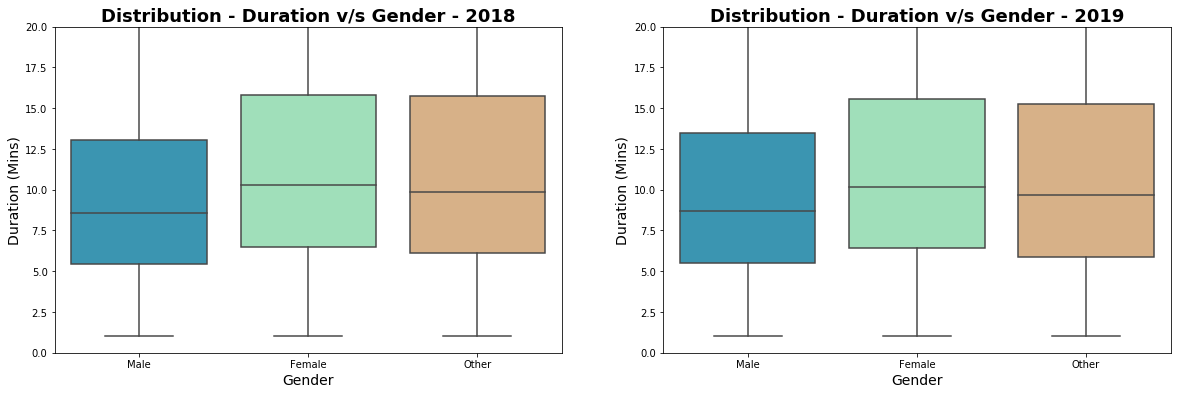

In [388]:
fig = plt.figure(figsize = [20, 6])

## 2018
plt.subplot(1, 2, 1)
plot_bars_3(bike_2018, 'member_gender', 'duration_minutes', 'rainbow', 'Gender', 'Duration (Mins)',
           'Distribution - Duration v/s Gender - 2018')


## 2019
plt.subplot(1, 2, 2)
plot_bars_3(bike_2019, 'member_gender', 'duration_minutes', 'rainbow', 'Gender', 'Duration (Mins)',
           'Distribution - Duration v/s Gender - 2019')

 > * Next was the relationship between the duration and the gender to see if the duration of renting / riding the bike changes deending upon the gender.
> * As can be seen from the above graph, **women** seems to be renting or riding the bikes for a longer duration on an average when compared to **men**
> * The above pattern was visible in the year **2018 and 2019** both
> * Also, the average duration in minutes for **men** was approx. **8.75 mins** while that for **women** was approx. **10.5 mins**
>
> 
> Next I will look at the Age distribution with the Duration of renting the bike

### *3. Relationship between the Duration of the Ride v/s the Age of the Customer:*

Text(0.5, 1.0, 'Distribution - Duration v/s Age - 2019')

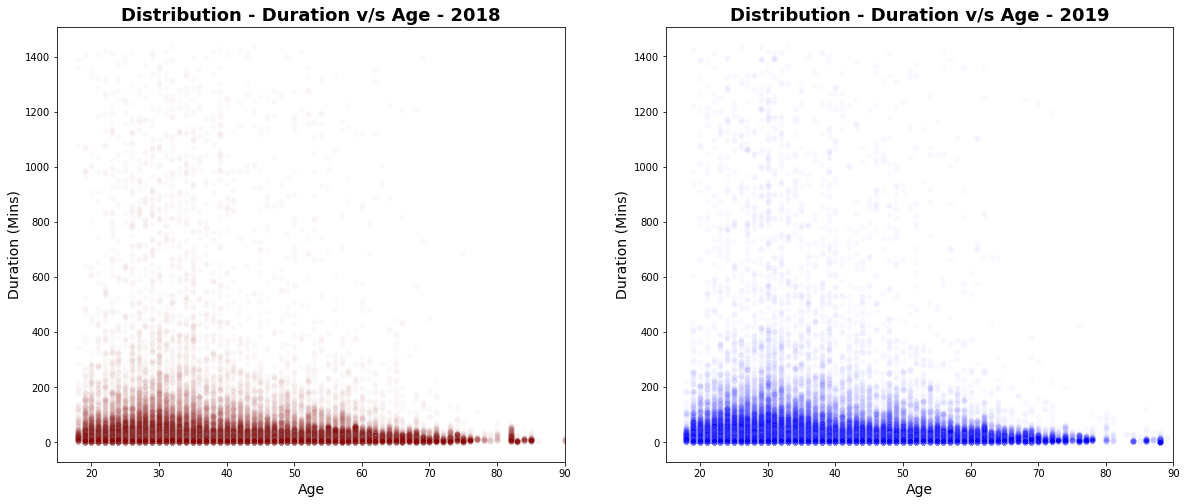

In [389]:
fig = plt.figure(figsize = [20, 8])

# 2018
plt.subplot(1, 2, 1)
sb.scatterplot(x='Age', y = 'duration_minutes', data = bike_2018, alpha = 0.025, color = 'darkred')
plt.xlim(15, 90)
plt.xlabel( 'Age', fontsize = 14)
plt.ylabel( 'Duration (Mins)', fontsize = 14)
plt.title( 'Distribution - Duration v/s Age - 2018', fontsize = 18, fontweight="bold")

# 2019
plt.subplot(1, 2, 2)
sb.scatterplot(x='Age', y = 'duration_minutes', data = bike_2019, alpha = 0.025, color = 'blue')
plt.xlim(15, 90)
plt.xlabel( 'Age', fontsize = 14)
plt.ylabel( 'Duration (Mins)', fontsize = 14)
plt.title( 'Distribution - Duration v/s Age - 2019', fontsize = 18, fontweight="bold")

> * The relationship between Age and the Duration shows a very predictive pattern
> * Younger people are more likely to travel a greater distance, upto 1400 mins, as compared to older people. In both the years, this age group happens to be **Less than 40 years**
> * Also, there are **more people** who rented the bikes in 2019 as compared to 2018. This is visible from the color density of the graphs, which appears to be more for **blue** than for red.
> * The data seemed to have few **errors** as some of the people with age **140** seemed to have rented the bikes. Though possible, it seems pretty unlikley to happen. So I have filtered out the age segment beyond **90 years**
>
> 
> Next I will look at the gender distribution with the Top places from where the Bikes were rented from.

### *4. Relationship between the Gender of the Ride v/s the Top places from where the Bikes were rented from*

Text(0.5, 1.0, 'Gender Distribution v/s Top Rental Places - 2019')

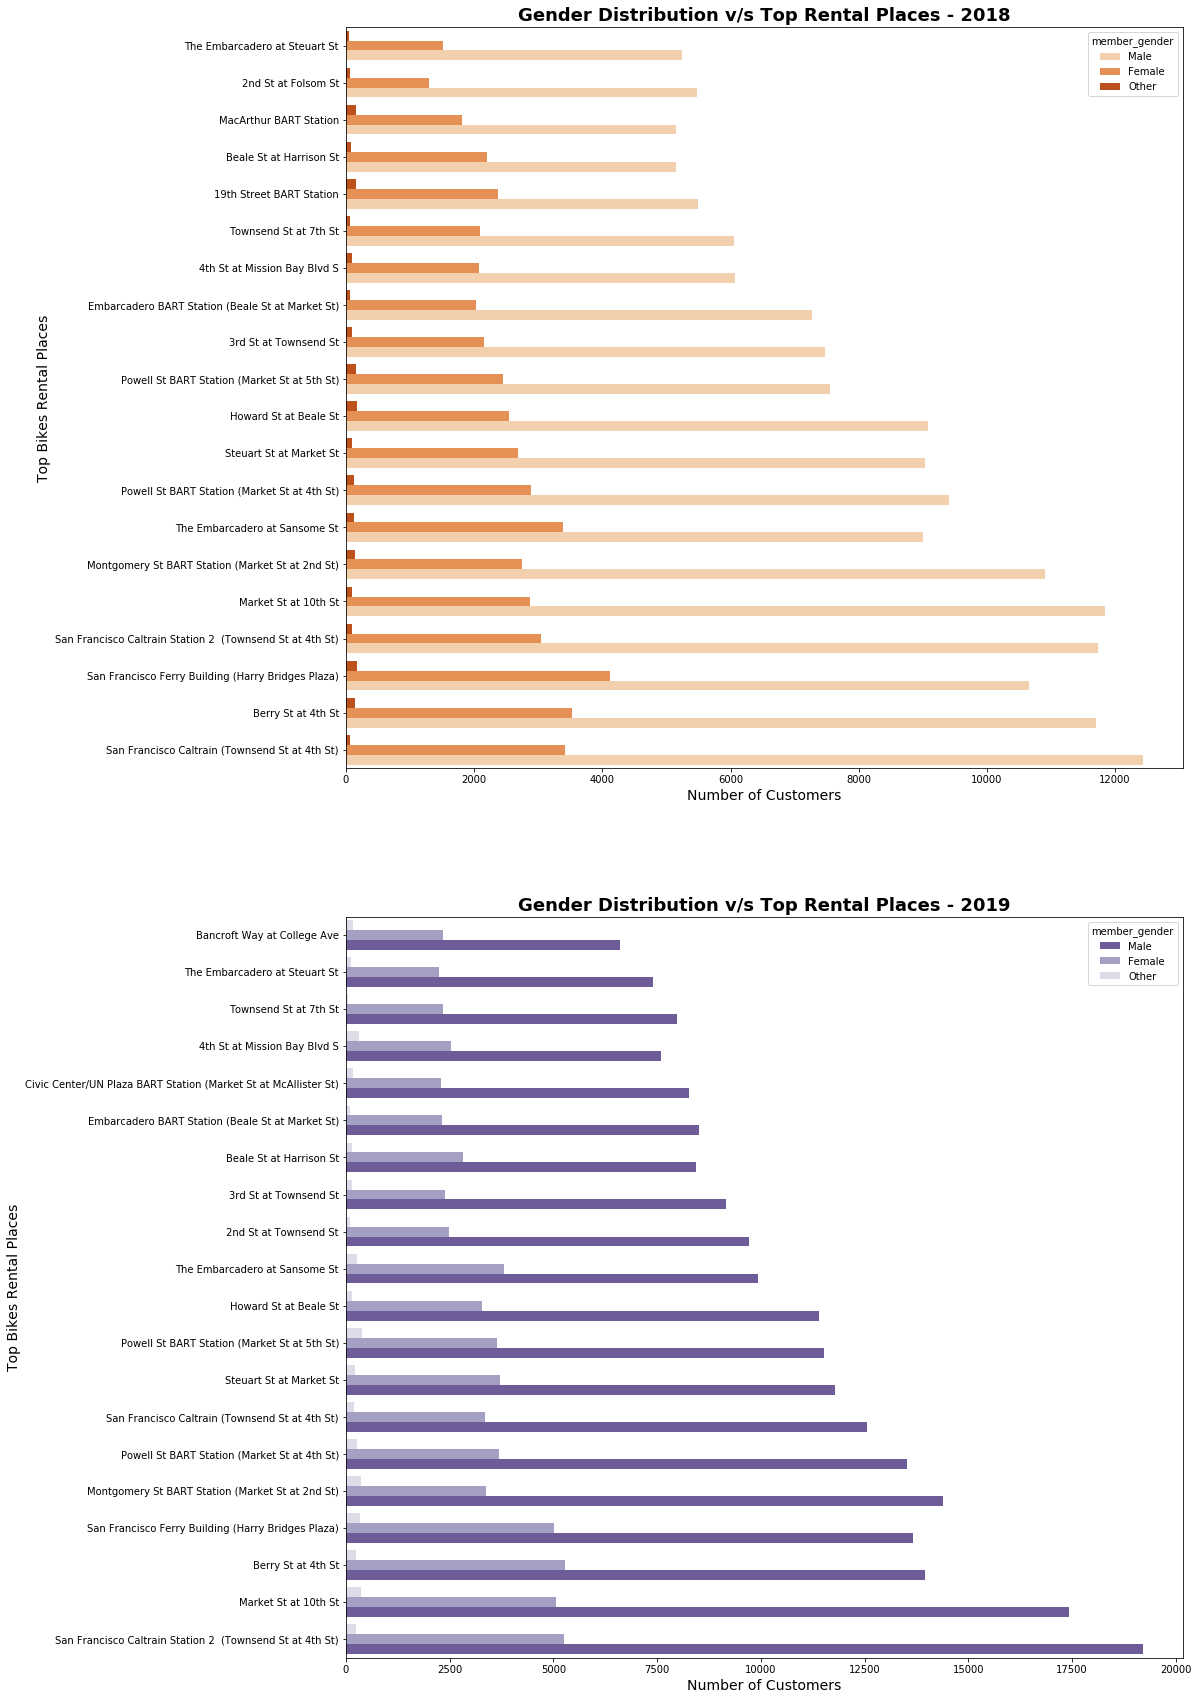

In [390]:
fig = plt.figure(figsize = [15, 30])

## 2018
plt.subplot(2, 1, 1)
sb.countplot(y = 'start_station_name', data = bike_2018, palette='Oranges', hue= 'member_gender',
             order = bike_2018['start_station_name'].value_counts().index, orient = 'v')
plt.ylim(-0.5,19.5)
plt.xlabel( 'Number of Customers', fontsize = 14)
plt.ylabel( 'Top Bikes Rental Places', fontsize = 14)
plt.title( 'Gender Distribution v/s Top Rental Places - 2018', fontsize = 18, fontweight="bold")

## 2019
plt.subplot(2, 1, 2)
sb.countplot(y = 'start_station_name', data = bike_2019, palette='Purples_r', hue= 'member_gender',
             order = bike_2019['start_station_name'].value_counts().index, orient = 'v')
plt.ylim(-0.5,19.5)
plt.xlabel( 'Number of Customers', fontsize = 14)
plt.ylabel( 'Top Bikes Rental Places', fontsize = 14)
plt.title( 'Gender Distribution v/s Top Rental Places - 2019', fontsize = 18, fontweight="bold")


> * The reason to explore the relationship between the **Place of Renting bike** and **gender** was to see if there is fluctuations in the number of **male** or **female** who rent bikes from a **certain place**.
> * As can bee seen form the graph of **2018 and 2019**, the distribution of number of **females** for the **Top 20 places of renting bikes** is very **constant**. It follows a **gradual decrease** as the number of customers decrease. Small amount of fluctuation is visible, but nothing **alarming** as such.
> * Same trend is seen with the **Male** counterparts and nothing uniques can be said about the distribution here as well.
> As explored before, the **Men** dominate as the number of customers who rent the bikes.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> * The relationships between the **feature of interest: duration** and the rest of the features was not that insightful
> * The relation between **Duration and Age** and **Duration and Month** showed no unique trend. They were very uniformly distributed among the categories. No real **trend could be Observed**. Younger people tend to have rented bike for a longer duration while the **Avereage duration time** for almost **Similar** among all the **Months**.
> * Some interesting discovery was possible while plotting the **Duration vs gender** graph. one would expect that **men** would have travelled for a longer duration than **Women**, but this is not the case. As can be observed from the graph, **Women** tend to travel a longer distance as compared to **Men**. One needs to be careful though, as the **Mean duration** calculated is after getting rid of the **outliers**. If they were to be included, maybe the results would be different. Also, There are amny more **Men** as compared to **Women** who tend to rent the bikes. This may also result in Lower Duration average for men.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> * Nothing unique was observed when I plotted **Gender parameter with Place of renting bikes**.
> * As expected, the total number of customers reduced gradually once we started going down from the Top most place of renting bikes.
> * What was unique to observe was that the **proportion** of **Male** and **Female** distribution was maintained while the total number of customers decreased. This pattern can be observed visually as well from the graphs of **2018 and 2019**.



## Multivariate Exploration

> The main thing I want to explore in this part of the analysis is how different **Features** play into the relationship with **Duration**.

### *1. Relationship between the Duration of the Ride v/s the Month of the Year v/s Gender:*

Text(0.5, 1.0, 'Distribution - Duration (Mins) v/s Month v/s Gender - 2019')

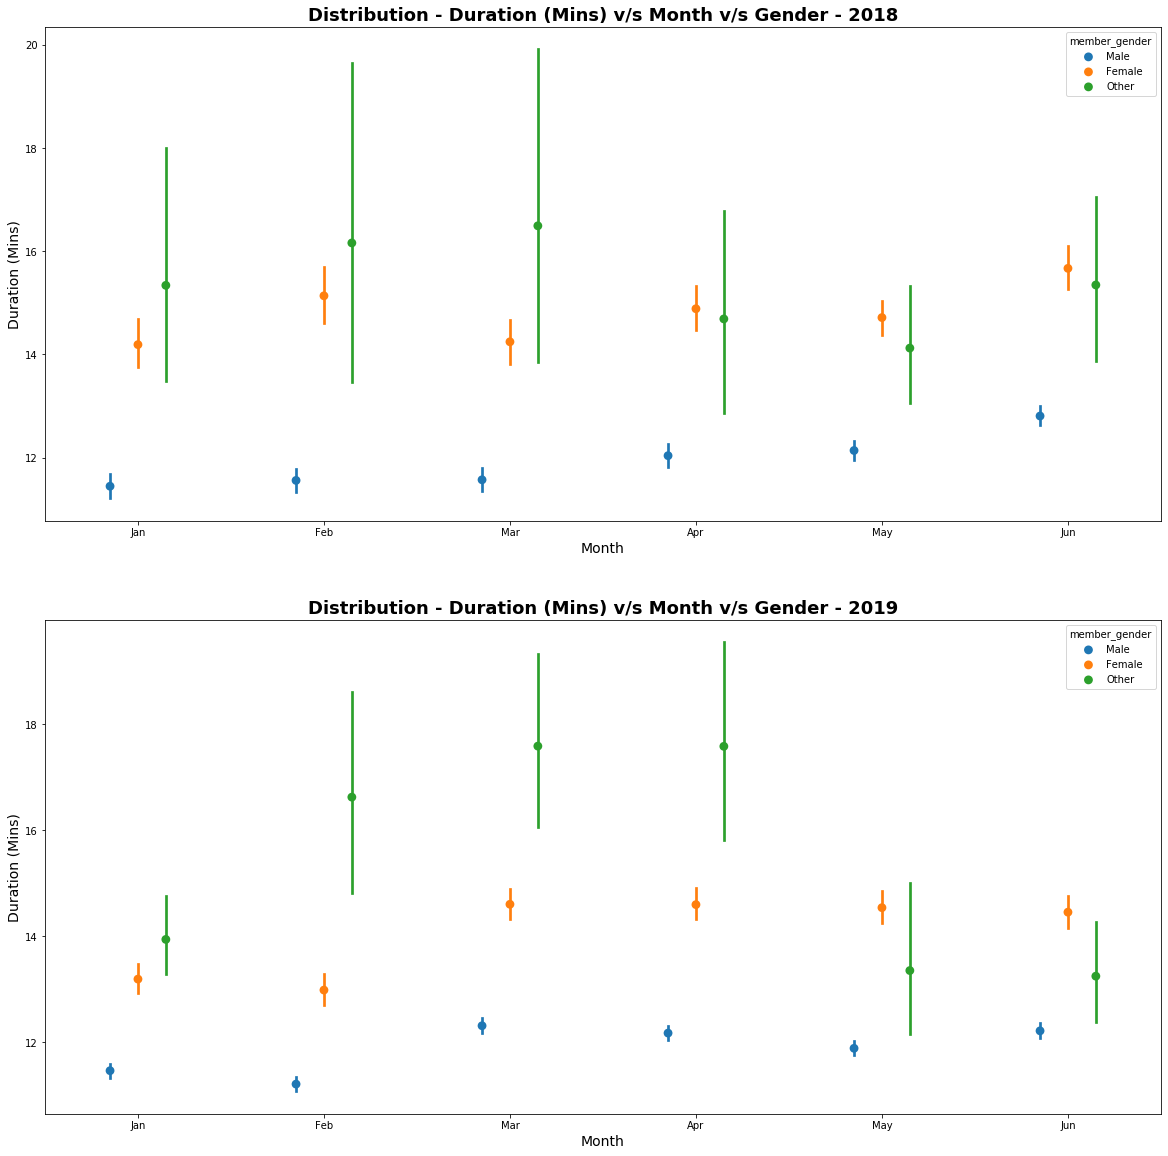

In [391]:
fig = plt.figure(figsize = [20, 20])

## 2018
plt.subplot(2, 1, 1)
sb.pointplot(data = bike_2018, x = 'start_month', y = 'duration_minutes', hue = 'member_gender',
                  dodge = 0.3, linestyles = "")
plt.xlabel( 'Month', fontsize = 14)
plt.ylabel( 'Duration (Mins)', fontsize = 14)
plt.title( 'Distribution - Duration (Mins) v/s Month v/s Gender - 2018', fontsize = 18, fontweight="bold")


## 2019
plt.subplot(2, 1, 2)
sb.pointplot(data = bike_2019, x = 'start_month', y = 'duration_minutes', hue = 'member_gender',
                  dodge = 0.3, linestyles = "")
plt.xlabel( 'Month', fontsize = 14)
plt.ylabel( 'Duration (Mins)', fontsize = 14)
plt.title( 'Distribution - Duration (Mins) v/s Month v/s Gender - 2019', fontsize = 18, fontweight="bold")

> * Not much difference was observed between the pattern of **2018** and **2019**.
> * There seemed to be a clear difference in the **Average Duration of riding/renting bikes** among the **Male** and the **Female** for both the years. This is something that we explored in our Bivariate exploration as well.
> * Also, There is a slight fluctuation in the **Mean Duration** among the **Months** in the year **2019**. This was **Not Visible** in the Bivariate graph. I guess, further separating the values based on the **gender** helped a lot. We can observe that the **Average Duration** time for the month of **January and February** are pretty low for **Male and Female** when compared to the rest of the months for the year **2019**
>
>
> Next we will explore the relation between Age / Month / Gender.

### *2. Relationship between the Age of the Rider v/s the Month of the Year v/s Gender:*

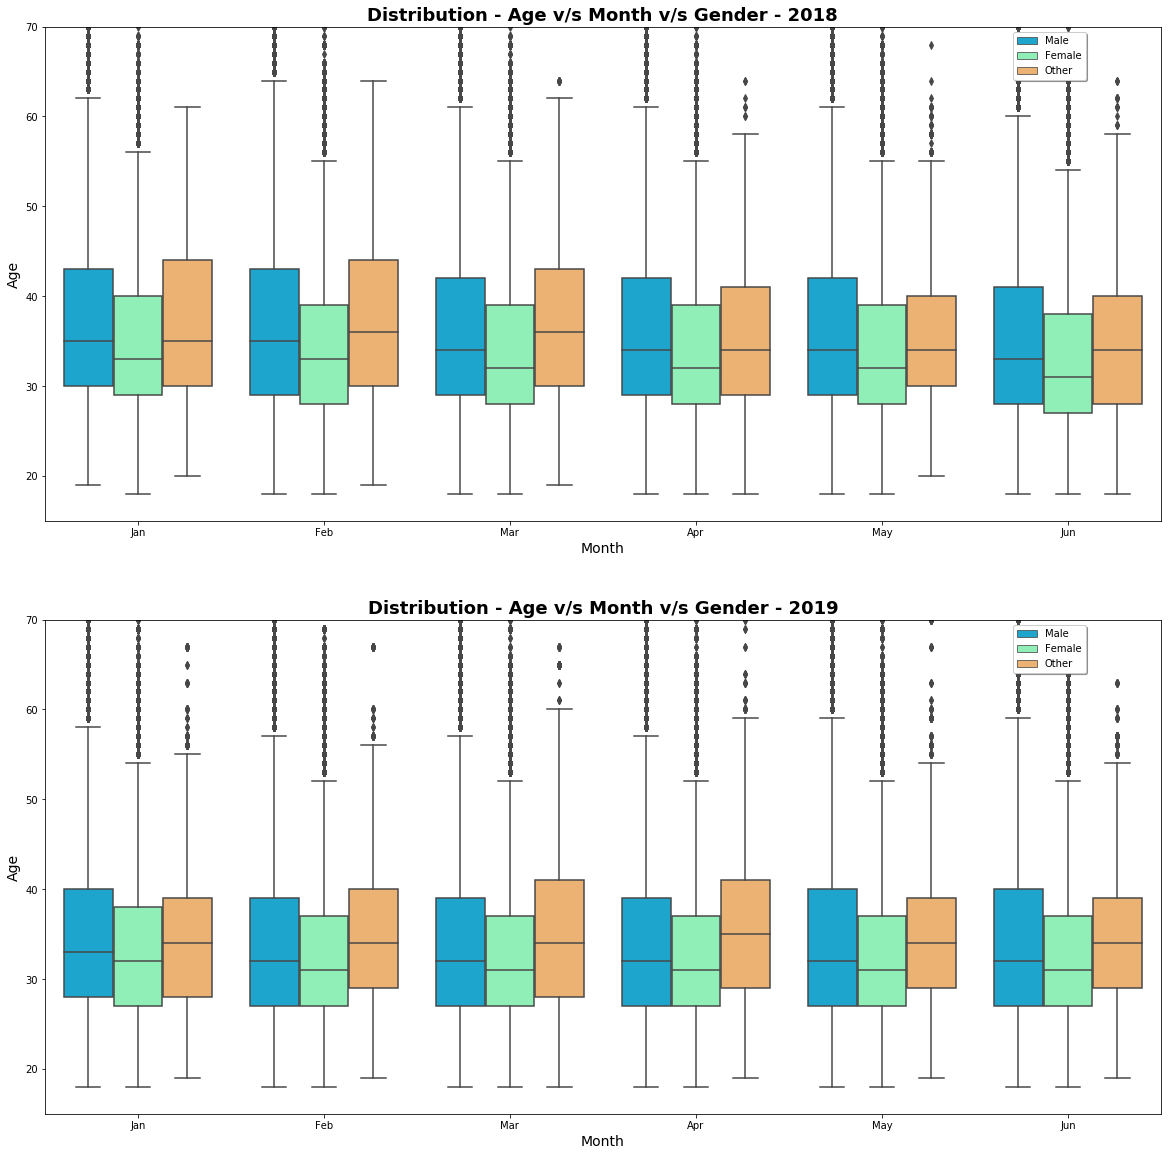

In [392]:
fig = plt.figure(figsize = [20, 20])

## 2018
plt.subplot(2, 1, 1)
sb.boxplot(data = bike_2018, x = 'start_month', y = 'Age', hue = 'member_gender',
                  dodge = 0.3, palette= 'rainbow')
plt.ylim(15, 70)
plt.xlabel( 'Month', fontsize = 14)
plt.ylabel( 'Age', fontsize = 14)
plt.title( 'Distribution - Age v/s Month v/s Gender - 2018', fontsize = 18, fontweight="bold")
plt.legend(loc='upper center', bbox_to_anchor=(0.9, 1), shadow=True)


## 2019
plt.subplot(2, 1, 2)
sb.boxplot(data = bike_2019, x = 'start_month', y = 'Age', hue = 'member_gender',
                  dodge = 0.3, palette= 'rainbow')
plt.ylim(15, 70)
plt.xlabel( 'Month', fontsize = 14)
plt.ylabel( 'Age', fontsize = 14)
plt.title( 'Distribution - Age v/s Month v/s Gender - 2019', fontsize = 18, fontweight="bold")
plt.legend(loc='upper center', bbox_to_anchor=(0.9, 1), shadow=True)

> * Few interesting finding can be obtained from the above graph.
> * The **Average age of Female** tends to be lower than the **Average Age of Men**. Again care should be taken that the Outliers are not taken into calculation here.
> * Also, there is almost an **Identical** pattern the graph distribution between the year **2018 and 2019**. This suggest that the Customer segment hasn't changed much during the Two years
> * Also, The Age distribution is similar or almost similar among the **months** as well. This can lead to a interpretation that the Same Customer segment tends to use the **Bike Service** more often.
>
> Next we will explore the relation between Duration / Place of Renting Bike / Gender.

### *3. Relationship between the Duration of the Ride v/s the Place of Renting v/s Gender:*

 * Though we have explored almost all the possible combination to find a relationship between factors that affect the **duration of ride**, **Place of Renting** feature is somehow to big to accomodate in a normal graph.
 * Hence, I have used the following heatmap to show the relationship between **Gender, Duration mean and the Place of Renting the Bikes**.
 * This map show be taken as a **reference point** to further **explore** the data set as per individual requirement or the scope of the work from a **Place of Renting** point-of-view.
 * Hence not much insight, if any, will be provided after the graph. As it is too big a task to provide insight on 300+ locations together.

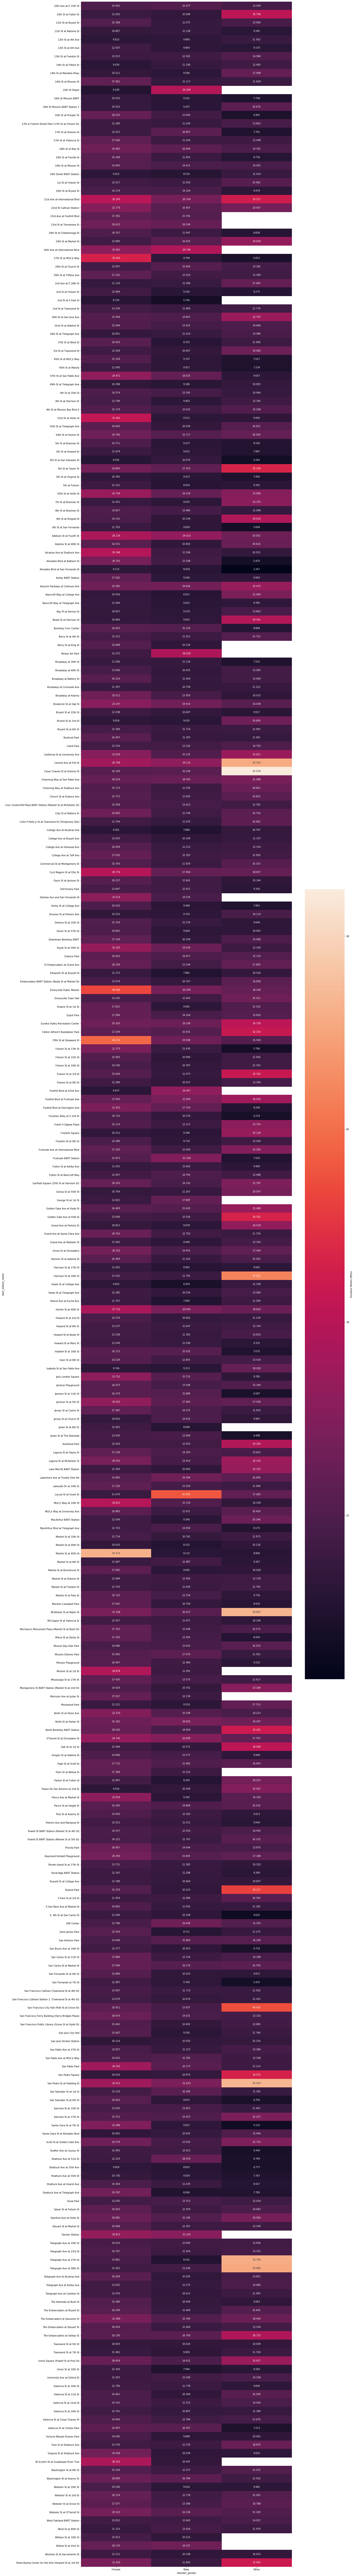

In [393]:
fig = plt.figure(figsize = [20, 200])

bike_2018_duration_mean = bike_2018.groupby(['start_station_name', 'member_gender']).mean()['duration_minutes']
bike_2018_duration_mean = bike_2018_duration_mean.reset_index(name = 'duration_minutes_avg')
bike_2018_duration_mean = bike_2018_duration_mean.pivot(index = 'start_station_name', columns = 'member_gender',
                            values = 'duration_minutes_avg')
sb.heatmap(bike_2018_duration_mean, annot = True, fmt = '.3f', cbar_kws = {'label' : 'Duration Means (Mins)'})

> * The above graph describes the **Average Duration** of ride for each of the Place from where the Bike was rented from. This can provide insights on the places that are more likely to have **Higher Duration Ride** and should be marketed accordingly.
> * Needless to say, **Females** tend to travel more than the **Men**

### *4. Relationship between the Age of the Rider v/s the Place of Renting v/s Gender:*

 * Though we have explored almost all the possible combination to find a relationship between factors that affect the **duration of ride**, **Place of Renting** feature is somehow to big to accomodate in a normal graph.
 * Hence, I have used the following heatmap to show the relationship between **Gender, Age mean and the Place of Renting the Bikes**.
 * This map show be taken as a **reference point** to further **explore** the data set as per individual requirement or scope of the work from a **Place of Renting** point-of-view.
 * Hence not much insight, if any, will be provided after each graph. As it is too big a task to provide insight on 300+ locations together. 

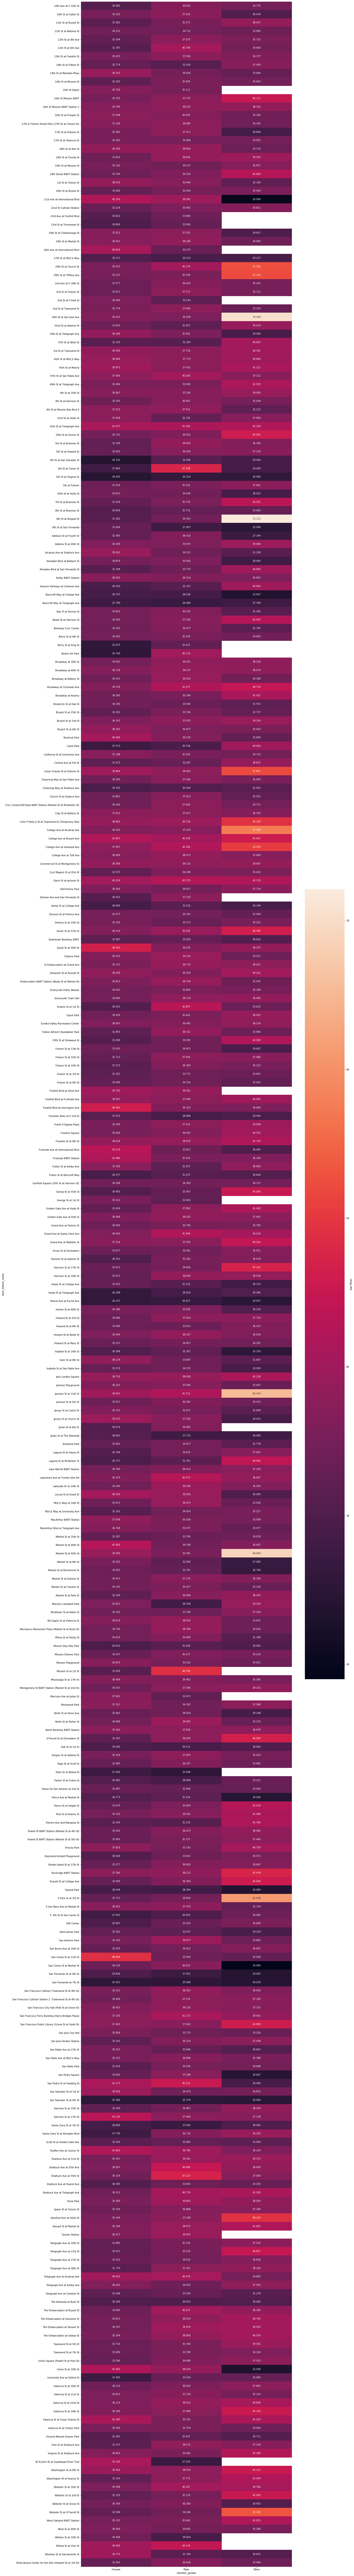

In [394]:
fig = plt.figure(figsize = [20, 200])

bike_2018_age_means = bike_2018.groupby(['start_station_name', 'member_gender']).mean()['Age']
bike_2018_age_means = bike_2018_age_means.reset_index(name = 'Age_avg')
bike_2018_age_means = bike_2018_age_means.pivot(index = 'start_station_name', columns = 'member_gender',
                            values = 'Age_avg')
sb.heatmap(bike_2018_age_means, annot = True, fmt = '.3f', cbar_kws = {'label' : 'Age Mean'})

> * The above graph describes the **Average Age** of ride for each of the Place from where the Bike was rented from. This can provide insights on the places that are more likely to have **Younger customers** and should be marketed accordingly.
> * **Younger Females** tend to ride bikes as compared to **Men**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> * Firstly, when we look at the distribution of **Duration v/s Month and Gender**, the pattern is pretty much the same as observed in the Bivariate explorations. **Females** tend to ride for a longer duration than **men** and this difference in approx. **2 minutes**.
    > * However, there was slight difference in the pattern of distribution in the year 2019. Customers, both **Female and Male** tend to have rented or driven the bike for lesser time in the month of **January and February** when compared to the rest of the Months in the dataset. This difference was not visible in the **year 2018**
>
> * Secondly, not much of difference was observed when we plotted **Age v/s month and Gender**. The graphs generated for the year **2018 and 2019** were almost identical. **Younger Females as compared to Males** rented the bikes. Whereas, the Age distribution acros the **Months** didn't change much suggesting a **regular customer** traffic for all the months.

### Were there any interesting or surprising interactions between features?

> Except for the difference in the **Mean Duration** of renting bikes for the first 2 months of **2019**, nothing surprising was observed. These relationships, individually explored in the Bivariate and Univariate plots, had the same story to tell.

In [27]:
## Exporting the files to be used for the Slide deck:
bike_2018.to_csv('bike_2018', index = False)
bike_2019.to_csv('bike_2019', index = False)